<div style="border:solid Chocolate 2px; padding: 40px">

Привет, меня зовут Александр Куимов. Я буду ревьюером твоего проекта. Ты можешь обращаться ко мне на "ты"😏 Надеюсь, тебя также не смутит, если я буду обращаться к тебе на "ты", но если это неудобно, обязательно скажи об этом! 

Пожалуйста, не удаляй мои комментарии, они будут особенно полезны для нашей работы в случае повторной проверки проекта. 

Ты также можешь реагировать на мои комментарии своими по шаблону, показанному чуть ниже. Это нужно, чтобы не создавалась путаница😉

Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
 В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>
    
    
<br/>    
<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> В такой цветовой ячейке я прошу тебя оставлять свои комментарии. Если исправляешь проект на второй итерации и выше, не забывай пожалуйста указывать номер итерации, например, "Комментарий студента v.2".
</div> 

<br/>    
    
Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой руководитель будет поступать также, и я пытаюсь подготовить тебя именно к работе датасаентистом. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку!🤓

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

 <div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Вижу твое добавленное описание проекта. Молодец! Это поможет тебе расставлять акценты в выводах

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn.dummy import DummyRegressor

In [2]:
df_train = pd.read_csv('/datasets/gold_industry_train.csv')
df_test = pd.read_csv('/datasets/gold_industry_test.csv')
df_full = pd.read_csv('/datasets/gold_industry_full.csv')

In [3]:
# display(df_train.head())
# display(df_test.head())
# df_full.head()

In [4]:
display(df_train.shape)
display(df_test.shape)
df_full.shape

(14579, 87)

(4860, 53)

(19439, 87)

In [5]:
# display(df_train.info())
# display(df_test.info())
# df_full.info()

In [6]:
# df_train.hist(figsize=(30, 30));
# df_test.hist(figsize=(20, 20));
# df_full.hist(figsize=(30, 30));

In [7]:
# 1.2. Проверим, что эффективность обогащения рассчитана правильно. 
# Вычислим её на обучающей выборке для признака rougher.output.recovery по формуле из описания технологического процесса.
rec_eff = ((df_train['rougher.output.concentrate_au']*(df_train['rougher.input.feed_au']-
                                                       df_train['rougher.output.tail_au']))/
          (df_train['rougher.input.feed_au']*(df_train['rougher.output.concentrate_au']-
                                              df_train['rougher.output.tail_au'])))*100
print(rec_eff.mean())
print(df_train['rougher.output.recovery'].mean())
# Найдем MAE между нашими расчётами и значением признака.
print(mean_absolute_error(rec_eff, df_train['rougher.output.recovery']))

82.52119968211336
82.52119968211336
9.83758577644259e-15


Значения средних наших расчетов и столбца rougher.output.recovery совпадают, а значение МАЕ довольно маленькое, значит эффективность рассчитана правильно.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Твое расссчитанное значение `MAE` верно)

In [8]:
# 1.3. Проанализируем признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?
missed_signs = set(df_train.columns) - set(df_test.columns)
missed_signs

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

 Некоторые параметры в тестовой выборке недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.
 К отсутствующим в тестовой выборке параметрам относятся параметры типа output(параметры продукта(а не сырья)) и calculation(расчётные характеристики). 

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
В тестовой выборке недоступны некоторые расчетные (calculation) и выходные (output) характеристики процесса, ведь их невозможно получить либо замерить во время выполнения технологического процесса

1.4. Проведем предобработку данных.

In [9]:
# Проверим пропуски.
display(df_train.isna().sum())
display(df_test.isna().sum())
df_full.isna().sum()

date                       0
rougher.input.feed_au      0
rougher.input.feed_ag      0
rougher.input.feed_pb     72
rougher.input.feed_sol    77
                          ..
final.output.recovery      0
final.output.tail_au       0
final.output.tail_ag       1
final.output.tail_pb      75
final.output.tail_sol      5
Length: 87, dtype: int64

date                                            0
rougher.input.feed_au                           0
rougher.input.feed_ag                           0
rougher.input.feed_pb                          28
rougher.input.feed_sol                         22
rougher.input.feed_rate                         4
rougher.input.feed_size                        44
rougher.input.floatbank10_sulfate               3
rougher.input.floatbank10_xanthate              1
rougher.state.floatbank10_a_air                 1
rougher.state.floatbank10_a_level               1
rougher.state.floatbank10_b_air                 1
rougher.state.floatbank10_b_level               1
rougher.state.floatbank10_c_air                 1
rougher.state.floatbank10_c_level               1
rougher.state.floatbank10_d_air                 0
rougher.state.floatbank10_d_level               0
rougher.state.floatbank10_e_air                 7
rougher.state.floatbank10_e_level               0
rougher.state.floatbank10_f_air                 0


date                        0
rougher.input.feed_au       0
rougher.input.feed_ag       0
rougher.input.feed_pb     100
rougher.input.feed_sol     99
                         ... 
final.output.recovery       0
final.output.tail_au        0
final.output.tail_ag        1
final.output.tail_pb      101
final.output.tail_sol       6
Length: 87, dtype: int64

In [10]:
# Заполним пропуски предыдущим значением, так как в соседние дни вряд ли сильно отличается результаты работы предприятия.
df_train.fillna(method='ffill', axis='rows', inplace=True)
df_test.fillna(method='ffill', axis='rows', inplace=True)
df_full.fillna(method='ffill', axis='rows', inplace=True)
# Проверяем.
display(df_train.isna().sum())
display(df_test.isna().sum())
df_full.isna().sum()

date                      0
rougher.input.feed_au     0
rougher.input.feed_ag     0
rougher.input.feed_pb     0
rougher.input.feed_sol    0
                         ..
final.output.recovery     0
final.output.tail_au      0
final.output.tail_ag      0
final.output.tail_pb      0
final.output.tail_sol     0
Length: 87, dtype: int64

date                                          0
rougher.input.feed_au                         0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_sol                        0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate            0
rougher.state.floatbank10_a_air               0
rougher.state.floatbank10_a_level             0
rougher.state.floatbank10_b_air               0
rougher.state.floatbank10_b_level             0
rougher.state.floatbank10_c_air               0
rougher.state.floatbank10_c_level             0
rougher.state.floatbank10_d_air               0
rougher.state.floatbank10_d_level             0
rougher.state.floatbank10_e_air               0
rougher.state.floatbank10_e_level             0
rougher.state.floatbank10_f_air               0
rougher.state.floatbank10_f_level       

date                      0
rougher.input.feed_au     0
rougher.input.feed_ag     0
rougher.input.feed_pb     0
rougher.input.feed_sol    0
                         ..
final.output.recovery     0
final.output.tail_au      0
final.output.tail_ag      0
final.output.tail_pb      0
final.output.tail_sol     0
Length: 87, dtype: int64

In [11]:
#проверим наши датасеты на дубликаты
display(df_train.duplicated())
display(df_train.duplicated())
df_train.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
14574    False
14575    False
14576    False
14577    False
14578    False
Length: 14579, dtype: bool

0        False
1        False
2        False
3        False
4        False
         ...  
14574    False
14575    False
14576    False
14577    False
14578    False
Length: 14579, dtype: bool

0        False
1        False
2        False
3        False
4        False
         ...  
14574    False
14575    False
14576    False
14577    False
14578    False
Length: 14579, dtype: bool

Отлично! Можно приступать к анализу.

<div class="alert  alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Верно!👍:\
</b> Верное решение по обработке пропусков, в признаках их не много. Все наблюдения представляют собой последовательные измерения, заполнить пропуски можно методами `pandas`: `ffill`/ `bfill`/ `interpolate` , это вполне уместно.\
Хочу посоветовать тебе статью, которая рассматривает разные способы обработки пропусков, выделяет их плюсы и минусы, думаю, тебе может быть интересно: https://loginom.ru/blog/missing   

## Анализ данных

2.1. Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате. Какие особенности имеют распределения?

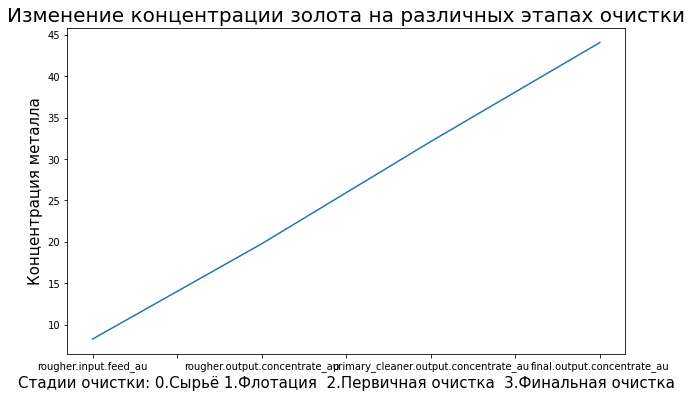

In [12]:
# Золото (Au):
df_full[['rougher.input.feed_au',
         'rougher.output.concentrate_au', 
              'primary_cleaner.output.concentrate_au', 
              'final.output.concentrate_au']].mean().plot(subplots=True, fontsize=10, figsize=(10, 6));
plt.title('Изменение концентрации золота на различных этапах очистки', fontsize=20);
plt.ylabel('Концентрация металла', fontsize=15)
plt.xlabel('Стадии очистки: 0.Сырьё 1.Флотация  2.Первичная очистка  3.Финальная очистка', fontsize=15);

Концентрация золота равномерно повышается в процессе очистки.

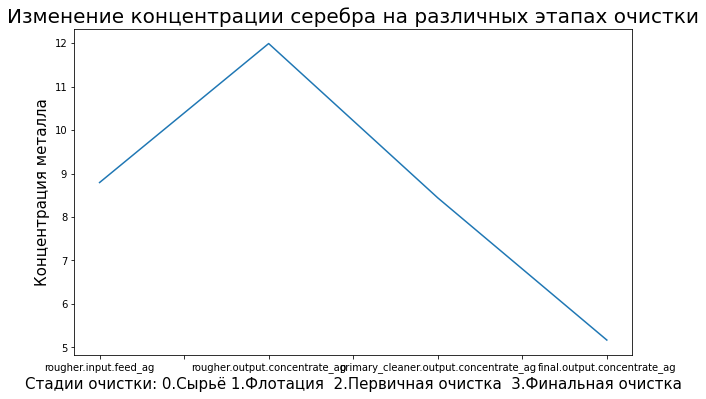

In [13]:
# Серебро (Ag):
df_full[['rougher.input.feed_ag',
         'rougher.output.concentrate_ag', 
              'primary_cleaner.output.concentrate_ag', 
              'final.output.concentrate_ag']].mean().plot(subplots=True, fontsize=10, figsize=(10, 6));
plt.title('Изменение концентрации серебра на различных этапах очистки', fontsize=20);
plt.ylabel('Концентрация металла', fontsize=15)
plt.xlabel('Стадии очистки: 0.Сырьё 1.Флотация  2.Первичная очистка  3.Финальная очистка', fontsize=15);

Концентрация серебра повышается после флотации и затем понижается в процессе очистки.

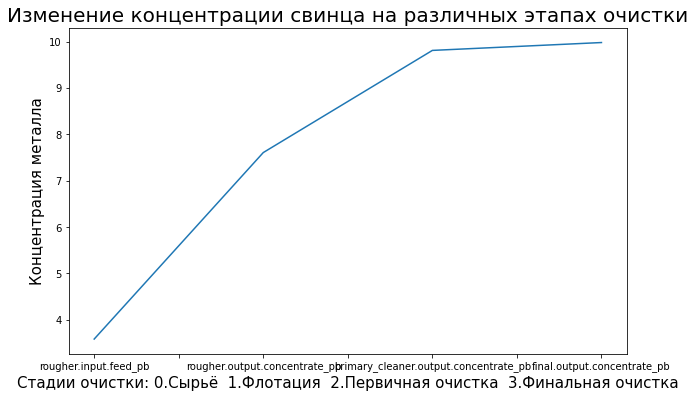

In [14]:
# Золото (Pb):
df_full[['rougher.input.feed_pb',
         'rougher.output.concentrate_pb', 
              'primary_cleaner.output.concentrate_pb', 
              'final.output.concentrate_pb']].mean().plot(subplots=True, fontsize=10, figsize=(10, 6));
plt.title('Изменение концентрации свинца на различных этапах очистки', fontsize=20);
plt.ylabel('Концентрация металла', fontsize=15)
plt.xlabel('Стадии очистки: 0.Сырьё  1.Флотация  2.Первичная очистка  3.Финальная очистка', fontsize=15);

Концентрация свинца равномерно повышается от сырья к первичной очистке, и незначительно повышается к финальной очистке.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Верно!👍:\
</b> Видно, что золото растёт в концентрации - это здорово!) А серебро падает - ведь наша цель -  золото, верно?)
А свинец - это побочный элемент химических реакций, по этой причине немного и увеличивается его концентрация

2.2.  Сравним распределения размеров гранул исходного сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

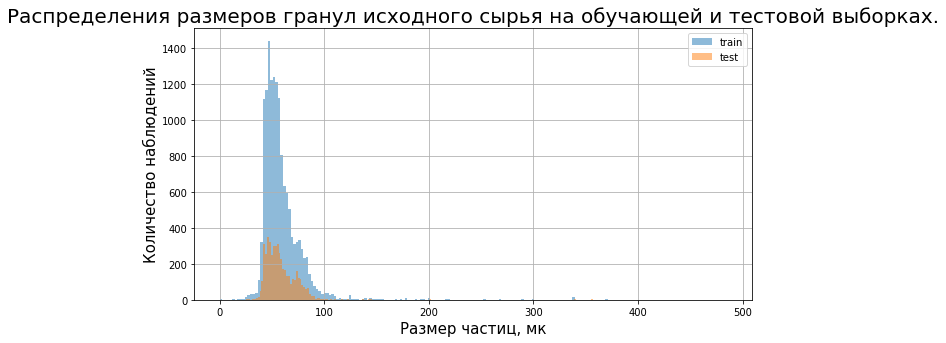

In [15]:
df_train['rougher.input.feed_size'].hist(bins=200, alpha=0.5, label='train', figsize=(10, 5))
df_test['rougher.input.feed_size'].hist(bins=200, alpha=0.5, label='test', figsize=(10, 5))
plt.xlabel('Размер частиц, мк', fontsize=15)
plt.ylabel('Количество наблюдений', fontsize=15)
plt.legend()
plt.title('Распределения размеров гранул исходного сырья на обучающей и тестовой выборках.', fontsize=20)
plt.show()

In [16]:
# Посмотрим описание.
display(df_train['rougher.input.feed_size'].describe())
df_test['rougher.input.feed_size'].describe()

count    14579.000000
mean        59.070865
std         22.903811
min          0.049194
25%         47.322462
50%         54.464259
75%         64.469177
max        484.967466
Name: rougher.input.feed_size, dtype: float64

count    4860.000000
mean       59.136150
std        19.512497
min         0.046369
25%        47.610795
50%        55.461058
75%        66.538910
max       363.989699
Name: rougher.input.feed_size, dtype: float64

In [17]:
# Посмотрим на дисперсии.
display(np.var(df_train['rougher.input.feed_size']))
np.var(df_test['rougher.input.feed_size'])

524.5485754742793

380.65918575448467

Что ж, на гистограмме видно, что распределения не сильно отличаются, учитывая большее количество наблюдений для обучающей выборки. Дисперсия для обучающей выборки равна 524, для тестовой -- 380. Разница не маленькая, но как видно по гистограмме в обучающих данных довольно много выбросов. Метод describe показал, что средний размер гранул сырья на обучающей выборке 59 микрон, и на тестовой также - 59, так что будем считать, что распределения примерно равны.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 

Распределения примерно одинаковы. Отлично, что использованы графики плотности, вместо гистограмм частотности)

2.3. Исследуем суммарную концентрацию металлов на разных стадиях: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате.

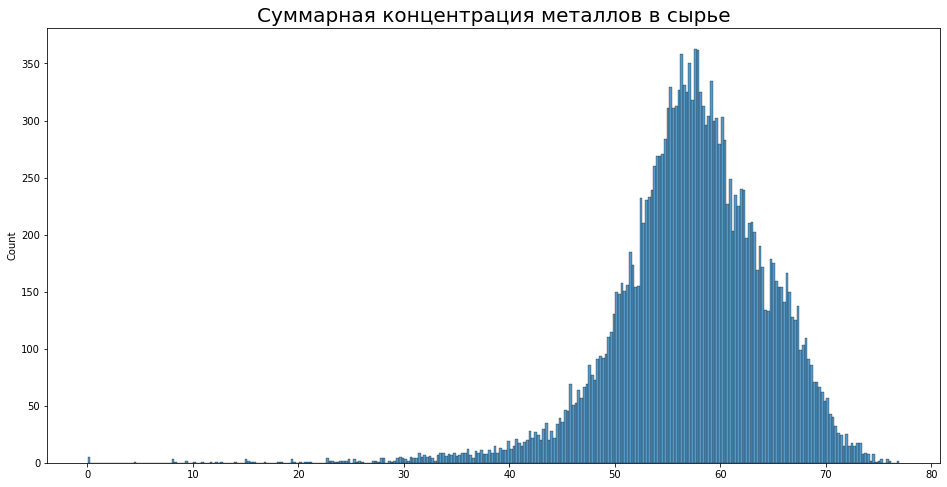

In [18]:
# Найдем суммарную концентрацию металлов (ag, pb, sol, au) в сырье
sum_r_feed = df_full[['rougher.input.feed_ag', 
                   'rougher.input.feed_pb', 
                   'rougher.input.feed_sol', 
                   'rougher.input.feed_au']].sum(axis=1)
# Построим гистограмму для суммарной концентрации металлов в сырье
plt.subplots(figsize = (16,8))
sns.histplot(sum_r_feed, bins=300)
plt.title('Суммарная концентрация металлов в сырье', fontsize=20);

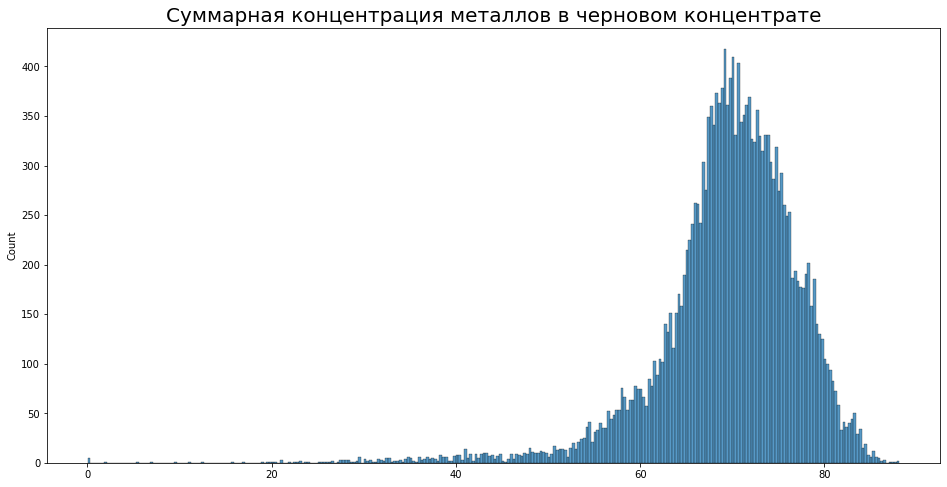

In [19]:
# Найдем суммарную концентрацию металлов (ag, pb, sol, au) в черновом концентрате
sum_r_conc = df_full[['rougher.output.concentrate_pb', 
                   'rougher.output.concentrate_ag', 
                   'rougher.output.concentrate_sol', 
                   'rougher.output.concentrate_au']].sum(axis=1)
sum_r_conc = sum_r_conc[sum_r_conc > 0]
# Построим гистограмму для суммарной концентрации металлов в черновом концентрате
plt.subplots(figsize = (16, 8))
sns.histplot(sum_r_conc, bins=300)
plt.title('Суммарная концентрация металлов в черновом концентрате', fontsize=20);

<br/>    
<div class="alert alert-info">
<h2><a class="tocSkip"> </h2>

<b></b>Добавил код, убирающий аномалии
</div> 

<br/> 

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

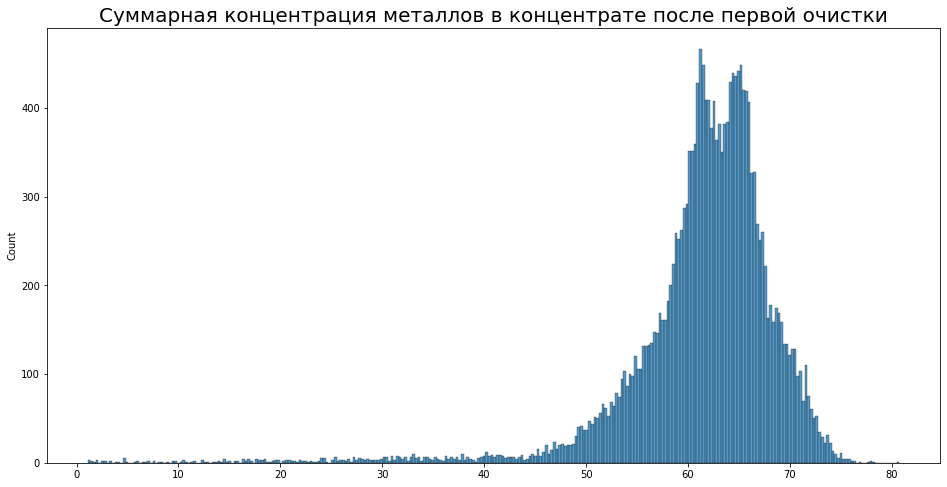

In [20]:
# Найдем суммарную концентрацию металлов (ag, pb, sol, au) в концентрате после первой очистки.
sum_r_conc = df_full[['primary_cleaner.output.concentrate_pb', 
                   'primary_cleaner.output.concentrate_ag', 
                   'primary_cleaner.output.concentrate_sol', 
                   'primary_cleaner.output.concentrate_au']].sum(axis=1)
sum_r_conc = sum_r_conc[sum_r_conc > 1]
# Построим гистограмму для суммарной концентрации металлов в черновом концентрате
plt.subplots(figsize = (16, 8))
sns.histplot(sum_r_conc, bins=300)
plt.title('Суммарная концентрация металлов в концентрате после первой очистки', fontsize=20);

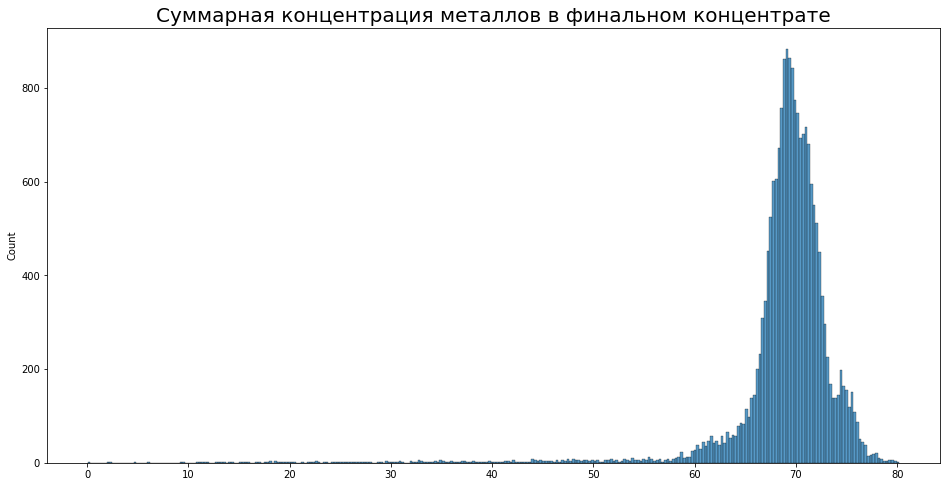

In [21]:
# Найдем суммарную концентрацию металлов (ag, pb, sol, au) в финальном концентрате
sum_fin_conc = df_full[['final.output.concentrate_pb', 
                   'final.output.concentrate_ag', 
                   'final.output.concentrate_sol', 
                   'final.output.concentrate_au']].sum(axis=1)
sum_fin_conc = sum_fin_conc[sum_fin_conc > 0]
# Построим гистограмму для суммарной концентрации металлов в финальном концентрате
plt.subplots(figsize = (16,8))
sns.histplot(sum_fin_conc, bins=300)
plt.title('Суммарная концентрация металлов в финальном концентрате', fontsize=20);

Мы видим, что аномалии в основном присутствуют на черновом этапе очистке и уменьшаются после первой очистки, особенном много значений в районе нуля. На этапе сырья их почти нет, в финальном концентрате есть, но не так много как на черновом. Эти аномалии могут влиять на конечные рассчетные характеристики. Мы могли бы их удалить, но поскольку в тестовой выборке содержатся только признаки для сырья, а в них почти нет аномалий, это не имеет большого смысла.

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>
    
Итак, суммарную концентрацию всех веществ на разных стадиях исследовали. Есть такой момент, что на гистограммах распределений суммарных концентраций имеются аномалии, и эти аномалии важно удалить по всем типам суммарных концентраций на обучающей выборке. Ведь отдельно по каждому веществу они могут быть (не всегда же есть крупинки золота в руде), а вот суммарно - вряд ли (в руде хоть что-то но будет) А если мы имеем аномалии, значит большая вероятность неточности в измерениях. Исправь, пожалуйста 

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

## Модель

In [22]:
# 3.1. Напишим функцию для вычисления итоговой sMAPE.
def smape_total(target_rougher, predicted_rougher, target_final, predicted_final):
    smape_rough = 1/len(target_rougher) * np.sum(2 * np.abs(
    target_rougher - predicted_rougher) / (np.abs(target_rougher) + np.abs(predicted_rougher))*100)
    smape_fin = 1/len(target_final) * np.sum(2 * np.abs(
    target_final - predicted_final) / (np.abs(target_final) + np.abs(predicted_final))*100)
    return (0.25*smape_rough) + (0.75*smape_fin)

def smape(target, predicted):
    return 1/len(target) * np.sum(2 * np.abs(
       target - predicted) / (np.abs(target) + np.abs(predicted))*100)
def smape_final(rougher, final):
    return 0.25*rougher + 0.75*final

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 

Функция правильная)

In [23]:
df_target = df_full[['date', 'rougher.output.recovery', 'final.output.recovery']]
df_target.head()

,date,rougher.output.recovery,final.output.recovery
0,2016-01-15 00:00:00,87.107763,70.541216
1,2016-01-15 01:00:00,86.843261,69.266198
2,2016-01-15 02:00:00,86.842308,68.116445
3,2016-01-15 03:00:00,87.226430,68.347543
4,2016-01-15 04:00:00,86.688794,66.927016


In [24]:
#и добавим эти признаки в тестовую выборку из полной
df_test = df_test.merge(df_target, how = 'left', on = 'date')

In [25]:
# удалим столбец с датой
df_test.drop(['date'], axis=1, inplace=True)

In [26]:
#удалим из тренировочной выборки те признаки, которых нет в тестовой
df_train = df_train.drop(set(df_train.columns)-set(df_test.columns), axis=1)

In [27]:
# выделим признаки на тренировочной выборке для чернового концентрата (rougher)
features_train_r = df_train.filter(regex='^rougher',axis=1)
features_train_r = features_train_r.drop(['rougher.output.recovery'], axis=1)
target_train_r = df_train['rougher.output.recovery']
# и для финального концентрата (final)
features_train_f = df_train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_train_f = df_train['final.output.recovery']
# #выделим признаки на тестовой выборке для чернового концентрата (rougher)
features_test_r = df_test.filter(regex='^rougher',axis=1)
features_test_r = features_test_r.drop(['rougher.output.recovery'], axis=1)
target_test_r = df_test['rougher.output.recovery']
# и для финального концентрата (final)
features_test_f = df_test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_test_f = df_test['final.output.recovery']

In [28]:
# проверим размер признаков
display(features_train_r.shape)
display(target_train_r.shape)

display(features_train_f.shape)
display(target_train_f.shape)

display(features_test_r.shape)
display(target_test_r.shape)

display(features_test_f.shape)
display(target_test_f.shape)

(14579, 22)

(14579,)

(14579, 52)

(14579,)

(4860, 22)

(4860,)

(4860, 52)

(4860,)

In [29]:
random_state = 12345
cv = 5
models = [LinearRegression(),
          DecisionTreeRegressor(random_state=random_state),
          RandomForestRegressor(random_state=random_state)]
results_cross_val = []

for model in models:
    scorer = make_scorer(smape, greater_is_better=False)
    cross_val_score_r = cross_val_score(model, features_train_r, target_train_r,
                                      cv=cv, scoring = scorer).mean()
    cross_val_score_f = cross_val_score(model, features_train_f, target_train_f,
                                      cv=cv, scoring = scorer).mean()
    results_cross_val.append({'Модель:': model.__class__.__name__,
                            'cross_val_score_r':cross_val_score_r,
                            'cross_val_score_f':cross_val_score_f})
    print(smape_final(cross_val_score_r, cross_val_score_f))
print(pd.DataFrame(results_cross_val))
print()

-11.575661607489604
-23.553415900957788
-12.849033562680212
                 Модель:  cross_val_score_r  cross_val_score_f
0       LinearRegression         -12.795377         -11.169090
1  DecisionTreeRegressor         -20.879640         -24.444675
2  RandomForestRegressor         -15.121181         -12.091651



In [30]:
# построим модель для линейной регрессии и сделаем кросс-валидацию методом cross_val_score
model = LinearRegression()
scorer = make_scorer(smape, greater_is_better=False)
rougher_lin = cross_val_score(model, features_train_r, target_train_r, scoring=scorer, cv=5)
final_lin =  cross_val_score(model, features_train_f, target_train_f, scoring=scorer, cv=5)
print('Итоговое sMape для линейной регрессии:', smape_final(rougher_lin, final_lin).mean())

Итоговое sMape для линейной регрессии: -11.575661607489604


In [31]:
# построим модель для решающего дерева и найдем наилучшие гиперпараметры
for depth in range(1, 12, 2):
    model2 = DecisionTreeRegressor(random_state=12345, max_depth = depth)
    scorer = make_scorer(smape, greater_is_better=False)
    rougher_tree = cross_val_score(model2, features_train_r, target_train_r, scoring=scorer, cv=5)
    final_tree = cross_val_score(model2, features_train_f, target_train_f, scoring=scorer, cv=5)
    print('Глубина:',depth)
    print('Итоговое sMAPE для решающего дерева:',smape_final(rougher_tree, final_tree).mean())
    print('')
print()

Глубина: 1
Итоговое sMAPE для решающего дерева: -11.968213994291878

Глубина: 3
Итоговое sMAPE для решающего дерева: -11.653951049054271

Глубина: 5
Итоговое sMAPE для решающего дерева: -12.154784769952121

Глубина: 7
Итоговое sMAPE для решающего дерева: -13.57152673563995

Глубина: 9
Итоговое sMAPE для решающего дерева: -15.86239673426579

Глубина: 11
Итоговое sMAPE для решающего дерева: -18.29155243956015




In [42]:
for leaf in range(1, 32, 2):
    for depth in range(1, 12, 2):
        model3 = DecisionTreeRegressor(random_state=12345, max_depth = depth, min_samples_leaf=leaf)
        scorer = make_scorer(smape, greater_is_better=False)
        rougher_tree = cross_val_score(model3, features_train_r, target_train_r, scoring=scorer, cv=5)
        final_tree = cross_val_score(model3, features_train_f, target_train_f, scoring=scorer, cv=5)
        print('min_samples_leaf', leaf)
        print('depth', depth)
        print('Итоговое sMAPE для решающего дерева:',smape_final(rougher_tree, final_tree).mean())
        print('')
print()

min_samples_leaf 1
depth 1
Итоговое sMAPE для решающего дерева: -11.968213994291878

min_samples_leaf 1
depth 3
Итоговое sMAPE для решающего дерева: -11.653951049054271

min_samples_leaf 1
depth 5
Итоговое sMAPE для решающего дерева: -12.154784769952121

min_samples_leaf 1
depth 7
Итоговое sMAPE для решающего дерева: -13.57152673563995

min_samples_leaf 1
depth 9
Итоговое sMAPE для решающего дерева: -15.86239673426579

min_samples_leaf 1
depth 11
Итоговое sMAPE для решающего дерева: -18.29155243956015

min_samples_leaf 3
depth 1
Итоговое sMAPE для решающего дерева: -11.968213994291878

min_samples_leaf 3
depth 3
Итоговое sMAPE для решающего дерева: -11.653951049054271

min_samples_leaf 3
depth 5
Итоговое sMAPE для решающего дерева: -12.11913202642387

min_samples_leaf 3
depth 7
Итоговое sMAPE для решающего дерева: -13.151975404390722

min_samples_leaf 3
depth 9
Итоговое sMAPE для решающего дерева: -14.883257167162673

min_samples_leaf 3
depth 11
Итоговое sMAPE для решающего дерева: -16

<br/>    
<div class="alert alert-info">
<h2><a class="tocSkip"> </h2>

<b></b> Перебор по гиперпораметрам показал, что лучший smare у глубины 3 и min_samples_leaf 3, и лучше чем у линейной регрессии
</div> 

<br/> 

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>
    
Следует использовать больше одного набора гиперпараметров хотя бы для одной модели, к примеру, перебирать как `max_depth`, так и `min_samples_leaf`. Напомню, что эти наборы следует еще и перебирать (с гридсерчем или вручную с циклами). Исправь, пожалуйста

In [32]:
# проверим лучшую модель на тестовой выборке
model_r = DecisionTreeRegressor(random_state=12345, max_depth = 3)
model_f = DecisionTreeRegressor(random_state=12345, max_depth = 3)
model_r.fit(features_train_r, target_train_r)
model_f.fit(features_train_f, target_train_f)
test_predictions_r = model_r.predict(features_test_r)
test_predictions_f = model_f.predict(features_test_f)
print('Итоговое sMAPE на тестовой выборке:',smape_total(
    target_test_r, test_predictions_r, target_test_f, test_predictions_f).mean())

Итоговое sMAPE на тестовой выборке: 7.824796586192598


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
        
Тестирование лучшей модели проведено правильно

<br/>    
<div class="alert alert-info">
<h2><a class="tocSkip"> </h2>

<b></b> Сравним с константной моделью
</div> 

<br/> 

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

In [33]:
dummy_model_r = DummyRegressor(strategy="mean")
dummy_model_f = DummyRegressor(strategy="mean")
dummy_model_r.fit(features_train_r, target_train_r)
dummy_model_f.fit(features_train_f, target_train_f)
test_predictions_r = dummy_model_r.predict(features_test_r)
test_predictions_f = dummy_model_f.predict(features_test_f)

print('Итоговое sMAPE для DummyRegressor:',smape_total(
    target_test_r, test_predictions_r, target_test_f, test_predictions_f).mean())

Итоговое sMAPE для DummyRegressor: 8.843396027364125


<br/>    
<div class="alert alert-info">
<h2>Итог: <a class="tocSkip"> </h2>

<b></b>Подготовлен прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Использованы данные с параметрами добычи и очистки.

Было сделано:

    - Подготовлены данные.
    - Проверено, что эффективность обогащения рассчитана правильно.
    - Проведен исследовательский анализ данных;
    - Изучено, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах обработки.
    - Сравнены распределения размеров гранул исходного сырья на обучающей и тестовой выборках.
    - Исследована суммарная концентрация металлов на разных стадиях.
    - Написана функция для вычисления итоговой sMAPE для оценки эффективности модели.
    - Построена и обучена модель.
    - Модель проверена на адекватность.

</div> 

<br/> 

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>
    
В каждом проекте при оценке качества модели, имеет смысл сравнивать ее с константной моделью (к примеру, которая предсказывает медиану по таргету). И в наш проект важно добавить это сравнение.  Создавать константные модели можно либо вручную, либо воспользоваться готовым алгоритмом <a href='https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html'>DummyRegressor</a> из пакета `sklearn`. 

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

<b>На доработку🤔:</b>
    
В конце выполнения каждой работы важно оставлять итоговый вывод, делиться какими-то рассуждениями, умозаключениями: какая задача перед тобой стояла, что было предпринято для ее выполнения и почему/для чего, с какими трудностями (особенностями данных) пришлось столкнуться, каким образом удалось с ними справиться, каких результатов удалось достичь, получилось ли у тебя реализовать задачу, поставленную в проекте. Это поможет тебе осмыслять проделанную работу полноценно, а не отдельными заданиями, список которых предоставили. В будущих проектах тебе нужно будет учиться все большей и большей самостоятельности при планировании своей работы. Осмысленное написание вывода должно помочь тебе проследить взаимосвязи между этапами, запомнить их логику.

<div style="border:solid Chocolate 2px; padding: 40px">


<h2> Итоговый комментарий ревьюера <a class="tocSkip"> </h2>    
    
  
У меня сложилось хорошее общее впечатление о проекте, тебе удалось неплохо справиться с таким объемным и сложным проектом. Молодец! Подготовлены данные для анализа, изучен каждый параметр. Все красиво визуализировано, построено несколько моделей регрессии и оценено их качество. Осмысленная аналитика и дельная модельная работа - многое удалось как надо)
    
Отмечу отдельные положительные моменты проекта🙂:
    
- в ходе проекта встречались функции, помогающие избавиться от дублирования кода;
- много красивых визуализаций в проекте и хорошая интерпретация;
- при обучении моделей использована кросс-валидация и поиск гиперпараметров.
    
Есть несколько моментов всего, на которые стоит ещё раз взглянуть, их я обзначил тебе в комментариях по ходу проекта. Предлагаю тебе доработать проект по моим комментариям, чтобы довести его до совершенства.

 
</div>

<div style="border:solid Chocolate 2px; padding: 40px">


<h2> Итоговый комментарий ревьюера v.2 <a class="tocSkip"> </h2>    
    
     
  
Теперь почти идеально. Принимаю работу)
    
Если хочешь лучше разобраться в ML, то могу посоветовать тебе: 
    
- Открытый курс машинного обучения: https://habr.com/ru/company/ods/blog/322626/   
    
- Книжка от ШАД: https://academy.yandex.ru/handbook/ml/
    
- Также рекомендую лекции от Andrew Ng: https://www.youtube.com/watch?v=PPLop4L2eGk&list=PLLssT5z_DsK-h9vYZkQkYNWcItqhlRJLN
- Избежать утечки данных при кросс-валидации тебе поможет <a href="https://towardsdatascience.com/pipeline-columntransformer-and-featureunion-explained-f5491f815f">конвеерная обработка данных</a>.     
    
- Не все признаки приносят пользу при моделировании. Инструмент <a href="https://proglib.io/p/feature-selector">FeatureSelector</a> поможет тебе отобрать важные признаки и избавит от ручной обработки.  Также можешь посмотреть статью на <a href="https://www.kaggle.com/code/prashant111/comprehensive-guide-on-feature-selection/notebook">Kaggle</a> (она сложнее).    
    
    
В этом проекте были отработаны несколько моментов. А самый очевидный: заметно, что разность метрик качества (константной и нашей модели) -  не слишком большая. Такое расхождение метрик допустимо в этом проекте. Что тогда  для дальнейшего улучшения качества моделирования возможно тут пересмотреть?
Попробую описать для тебя:
1. Качество данных на входе модели машинного обучения: повторно оценить аномалии, пропуски, соответствие законам химии и физики, все ли правдоподобно?
2. Работа с моделями машинного обучения:
- Создание новых признаков для моделей, Features Engineering: возможно стоит обратиться к технологу производства и ещё раз пробежаться по бизнес-цепочке процесса.
- Отбор самих моделей машинного обучения и гиперпараметров.
    
3. Параметры производственного процесса, к примеру: температура сырья, скорость ленточного конвейера, и.т.п.
    

Если провести Анализ измерительных систем, или MSA, то можно разобраться в причинах неточности полученных с производства данных. Статистический анализ данных, или SPC, - тоже будет являться незаменимым помощником в решении нашей задачи.
    
Добавлю здесь, что цель нашего проекта достигнута, а именно пройдены важные этапы подготовки данных и построения модели для производства золота.
    
Успехов тебе в следующем спринте!
    
Рад был помочь тебе)
    
</div>

## Чек-лист готовности проекта

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке выполнения
- [ ]  Выполнен шаг 1: данные подготовлены
    - [ ]  Проверена формула вычисления эффективности обогащения
    - [ ]  Проанализированы признаки, недоступные в тестовой выборке
    - [ ]  Проведена предобработка данных
- [ ]  Выполнен шаг 2: данные проанализированы
    - [ ]  Исследовано изменение концентрации элементов на каждом этапе
    - [ ]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [ ]  Исследованы суммарные концентрации
- [ ]  Выполнен шаг 3: построена модель прогнозирования
    - [ ]  Написана функция для вычисления итогового *sMAPE*
    - [ ]  Обучено и проверено несколько моделей
    - [ ]  Выбрана лучшая модель, её качество проверено на тестовой выборке